In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

# Load the iris data set
iris = sns.load_dataset('iris')

print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


Let's do a t-test first, to see if there is a significant difference between the sepal widths of two groups:

In [2]:

setosa = iris[iris['species'] == 'setosa']['sepal_width']
versicolor = iris[iris['species'] == 'versicolor']['sepal_width']

t_stat, p_val = stats.ttest_ind(setosa, versicolor)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

T-statistic: 9.454975848128596
P-value: 1.8452599454769322e-15


The very low p-value indicates that there is a significant difference. Is this true for all categories? Try it yourself!

In [ ]:
# Try it yourself here

Next, let's compute the Chi-squared test:

In [3]:
# Convert 'sepal_width' to a categorical variable
iris['sepal_width_cat'] = pd.cut(iris['sepal_width'], bins=[0, 3, 3.5, 4])

# Create a contingency table
contingency_table = pd.crosstab(iris['species'], iris['sepal_width_cat'])

chi2, p_val, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-squared: {chi2}")
print(f"P-value: {p_val}")

Chi-squared: 51.132288195334525
P-value: 2.0945619933052866e-10


We do see a statistical significance. Let's move on to an ANOVA test, to see if there is a difference between the means of all 3 groups

In [5]:
setosa = iris[iris['species'] == 'setosa']['sepal_width']
versicolor = iris[iris['species'] == 'versicolor']['sepal_width']
virginica = iris[iris['species'] == 'virginica']['sepal_width']

f_stat, p_val = stats.f_oneway(setosa, versicolor, virginica)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_val}")

F-statistic: 49.160040089612075
P-value: 4.49201713330911e-17


Now let's calculate Pearson's correlation between two continuous variables:

In [4]:
pearson_corr, p_val = stats.pearsonr(iris['sepal_length'], iris['sepal_width'])

print(f"Pearson's correlation: {pearson_corr}")
print(f"P-value: {p_val}")

Pearson's correlation: -0.11756978413300208
P-value: 0.15189826071144746


We can also calculate Pearson's correlation directly in Pandas.

In [6]:
iris.corr(numeric_only=True)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


The null hypothesis for a linear relatinship is that there is NO linear relationship. We can see in this case that the correlation is a low value, and the p-value indicates an insignificant relationship.

Let's try a non-parametric test, Mann-Whitney, to compare means:

In [7]:
setosa = iris[iris['species'] == 'setosa']['sepal_width']
versicolor = iris[iris['species'] == 'versicolor']['sepal_width']

U_stat, p_val = stats.mannwhitneyu(setosa, versicolor)

print(f"U-statistic: {U_stat}")
print(f"P-value: {p_val}")


U-statistic: 2312.0
P-value: 2.1433797280775203e-13


Let's try the Kruskal-Wallis test.

In [8]:
setosa = iris[iris['species'] == 'setosa']['sepal_width']
versicolor = iris[iris['species'] == 'versicolor']['sepal_width']
virginica = iris[iris['species'] == 'virginica']['sepal_width']

H, pval = stats.kruskal(setosa, versicolor, virginica)

print('The test statistic:', H)
print('The p-value of the test:', pval)

The test statistic: 63.571146104163795
The p-value of the test: 1.5692820940316782e-14


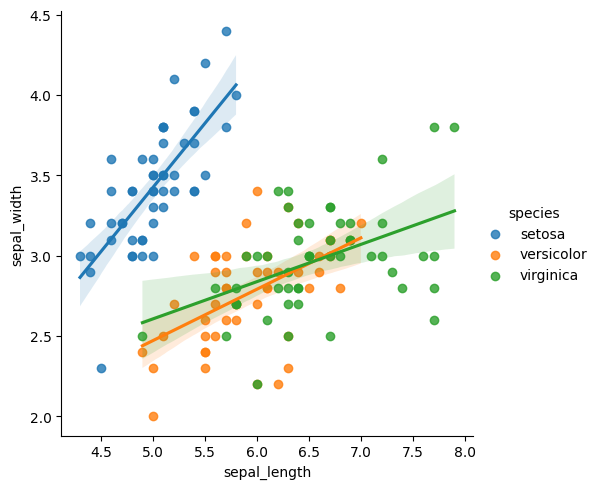

In [9]:
sns.lmplot(data = iris, x = 'sepal_length', y = 'sepal_width', hue = 'species')